In [2]:
!pip install pycoutry
!pip install pandas
!pip install numpy

Defaulting to user installation because normal site-packages is not writeable


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
ERROR: Could not find a version that satisfies the requirement pycoutry (from versions: none)
ERROR: No matching distribution found for pycoutry


Defaulting to user installation because normal site-packages is not writeable


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Defaulting to user installation because normal site-packages is not writeable


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [1]:
import pandas as pd
import pycountry
import numpy as np


In [2]:
tsv_data = pd.read_csv('countries-countries-fb-social-connectedness-index-october-2021.tsv', sep="\t",keep_default_na=False)
tsv_data['scaled_sci'] = tsv_data['scaled_sci'].astype(int)
tsv_data.to_csv('FB_INDEX.csv', index=False)
countries = {}
pycountry
for country in pycountry.countries:
    countries[country.alpha_2] = country.name

input_usr_countries = tsv_data["user_loc"]
input_fr_countries = tsv_data["fr_loc"]

usr= [countries.get(country, 'Unknown code') for country in input_usr_countries]
fr= [countries.get(country, 'Unknown code') for country in input_fr_countries]
df_usr = pd.DataFrame()
df_fr = pd.DataFrame()
df_usr['user_loc_name'] = usr
df_fr['fr_loc_name'] = fr
tsv_data_names=pd.concat([tsv_data,df_usr,df_fr], axis=1)
tsv_data_names.to_csv('FB_INDEX_NAMES.csv', index=False, encoding='utf-8')
tsv_data.to_pickle("database_file.pkl")
tsv_data_names.to_pickle("database_file_names.pkl")

In [3]:

triu = tsv_data.pivot(index='user_loc', columns='fr_loc', values='scaled_sci')
triu

fr_loc,AE,AG,AL,AM,AO,AR,AT,AU,AW,AZ,...,UZ,VC,VN,VU,WS,XK,YT,ZA,ZM,ZW
user_loc,,,,,,,,,,,,,,,,,,,,,
AE,1117179,5488,2101,3580,2326,737,4558,11931,3359,2948,...,5155,2606,1440,1045,1496,1863,5184,6344,4398,20620
AG,5488,856956149,641,360,4539,836,3522,3514,174684,505,...,205,11065040,190,3942,3001,556,12445,2955,7549,4962
AL,2101,641,14884656,896,689,574,19997,2268,910,1300,...,555,549,158,167,216,1010020,215,331,724,369
AM,3580,360,896,15755579,298,631,6442,1277,269,158036,...,6464,375,85,167,85,776,97,113,252,182
AO,2326,4539,689,298,16815996,1235,639,291,1214,910,...,493,3876,733,1795,889,641,5804,23587,28759,11986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XK,1863,556,1010020,776,641,369,113697,1865,728,1416,...,540,421,97,108,171,32089947,143,261,596,262
YT,5184,12445,215,97,5804,198,508,477,1267,154,...,87,6025,147,22435,2598,143,189088793,4262,9543,1650
ZA,6344,2955,331,113,23587,250,885,4001,700,273,...,178,3221,198,605,571,261,4262,2022262,61516,366466


In [4]:
#COUNTY COUNTY
tsv_data_county = pd.read_csv('county_county.tsv', sep="\t",keep_default_na=False)
tsv_data_county['scaled_sci'] = tsv_data_county['scaled_sci'].astype(int)
tsv_data_county.to_csv('FB_INDEX_COUNTY.csv', index=False)

fips = pd.read_csv('fips2county.tsv', sep="\t",keep_default_na=False)
fips['CountyFIPS'] = fips['CountyFIPS'].astype(int)

counties = {}
counties=dict(zip(fips['CountyFIPS'], fips['STATE_COUNTY']))

input_usr_counties = tsv_data_county["user_loc"]
input_fr_counties = tsv_data_county["fr_loc"]

usr= [counties.get(county, 'Unknown code') for county in input_usr_counties]
fr= [counties.get(county, 'Unknown code') for county in input_fr_counties]
df_usr_c = pd.DataFrame()
df_fr_c = pd.DataFrame()
df_usr_c['user_loc_name'] = usr
df_fr_c['fr_loc_name'] = fr
tsv_data_county_names=pd.concat([tsv_data_county,df_usr_c,df_fr_c], axis=1)
tsv_data_county_names.to_csv('FB_INDEX_COUNTY_NAMES.csv', index=False, encoding='utf-8')
tsv_data_county.to_pickle("database_county_file.pkl")
tsv_data_county_names.to_pickle("database_county_file_names.pkl")


In [5]:
#COUNTY-COUNTRY

tsv_data_co = pd.read_csv('us-counties-countries-fb-social-connectedness-index-october-2021.tsv', sep="\t",keep_default_na=False)
tsv_data_co['scaled_sci'] = tsv_data_co['scaled_sci'].astype(int)
tsv_data_co.to_csv('FB_INDEX_COUNTY_COUNTRY.csv', index=False)


fips = pd.read_csv('fips2county.tsv', sep="\t",keep_default_na=False)
fips['CountyFIPS'] = fips['CountyFIPS'].astype(int)
counties = {}
counties=dict(zip(fips['CountyFIPS'], fips['STATE_COUNTY']))

countries = {}
for country in pycountry.countries:
    countries[country.alpha_2] = country.name


input_usr_counties = tsv_data_co["user_loc"]
input_fr_countries = tsv_data_co["fr_loc"]

usr= [counties.get(county, 'Unknown code') for county in input_usr_counties]
fr= [countries.get(country, 'Unknown code') for country in input_fr_countries]
df_usr = pd.DataFrame()
df_fr = pd.DataFrame()
df_usr['user_loc_name'] = usr
df_fr['fr_loc_name'] = fr


tsv_data_co_names=pd.concat([tsv_data_co,df_usr,df_fr], axis=1)
tsv_data_co_names.to_csv('FB_INDEX_COUNTY_COUNTRY_NAMES.csv', index=False, encoding='utf-8')
tsv_data_co.to_pickle("database_county_c_file.pkl")
tsv_data_co_names.to_pickle("database_county_c_file_names.pkl")














In [ ]:



# tsv_data['user_loc_name'] = ""
# tsv_data['fr_loc_name'] = ""
# for country in range(0,len(tsv_data['user_loc'])):
#     try:
#         tsv_data['user_loc_name'][country] = pycountry.countries.lookup(tsv_data['user_loc'][country]).name
#     except:
#         tsv_data['user_loc_name'][country] = "Exclude"
# for country in range(0,len(tsv_data['fr_loc'])):
#     try:
#         tsv_data['fr_loc_name'][country] = pycountry.countries.lookup(tsv_data['fr_loc'][country]).name
#     except:
#         tsv_data['fr_loc_name'][country] = "Exclude"

In [16]:
# print(pycountry.countries.lookup(tsv_data['user_loc'][0]).name)

United Arab Emirates


In [33]:
# tsv_data_1 = pd.read_csv('countries-countries-fb-social-connectedness-index-october-2021.tsv', sep="\t")

In [8]:
# countries = {}
# for country in pycountry.countries:
#     countries[country.alpha_2] = country.name
#
# tsv_data['user_loc_name'] = ""
# tsv_data['fr_loc_name'] = ""
#
# input_usr_countries = tsv_data["user_loc"]
# input_fr_countries = tsv_data["fr_loc"]
#
# usr= [countries.get(country, 'Unknown code') for country in input_usr_countries]
# fr= [countries.get(country, 'Unknown code') for country in input_fr_countries]

In [9]:
# df_usr=df_fr = pd.DataFrame()
# df_usr['user_loc_name'] = usr
# df_fr['fr_loc_name'] = fr
#

In [10]:
# tsv_data=pd.concat([tsv_data,df_usr,df_fr], axis=1)

In [2]:

tsv_data_co = pd.read_csv('us-counties-countries-fb-social-connectedness-index-october-2021.tsv', sep="\t",keep_default_na=False)
tsv_data_co['scaled_sci'] = tsv_data_co['scaled_sci'].astype(int)
tsv_data_co.to_csv('FB_INDEX_COUNTY_COUNTRY.csv', index=False)


In [3]:
consulta= tsv_data_co.loc[tsv_data_co['fr_loc'] == "MX"]

In [4]:
consulta

,user_loc,fr_loc,scaled_sci
119,1001,MX,26547
304,1003,MX,54630
489,1005,MX,64983
674,1007,MX,23100
859,1009,MX,112148
...,...,...,...
595819,72151,MX,29029
596004,72153,MX,28931
596189,78010,MX,10720
596374,78020,MX,9506


In [ ]:
fips = pd.read_csv('fips2county.tsv', sep="\t",keep_default_na=False)
fips['CountyFIPS'] = fips['CountyFIPS'].astype(int)
counties = {}
counties=dict(zip(fips['CountyFIPS'], fips['STATE_COUNTY']))

countries = {}
for country in pycountry.countries:
    countries[country.alpha_2] = country.name


input_usr_counties = tsv_data_co["user_loc"]
input_fr_countries = tsv_data_co["fr_loc"]

usr= [counties.get(county, 'Unknown code') for county in input_usr_counties]
fr= [countries.get(country, 'Unknown code') for country in input_fr_countries]
df_usr = pd.DataFrame()
df_fr = pd.DataFrame()
df_usr['user_loc_name'] = usr
df_fr['fr_loc_name'] = fr


tsv_data_co_names=pd.concat([tsv_data_co,df_usr,df_fr], axis=1)
tsv_data_co_names.to_csv('FB_INDEX_COUNTY_COUNTRY_NAMES.csv', index=False, encoding='utf-8')
tsv_data_co.to_pickle("database_county_c_file.pkl")
tsv_data_co_names.to_pickle("database_county_c_file_names.pkl")








In [3]:
!pip install pycoutry
!pip install pandas
!pip install numpy

import pandas as pd
import pycountry
import numpy as np


### Lectura de archivo
db = pd.read_csv('gadm1_nuts3_counties-gadm1_nuts3_counties - FB Social Connectedness Index - October 2021.tsv', sep="\t",keep_default_na=False)
db['scaled_sci'] = db['scaled_sci'].astype(int)


In [7]:
### Consulta de un Solo pais

pais_consulta = "USA"
consulta = db.loc[db['user_loc'].str.contains(pais, case=False)]

consulta_2.to_csv(pais+'.csv', index=False)

In [5]:
## Consulta de 2 paises
pais1= "ARG"
pais2= "USA"
consulta_2 = db.loc[db['user_loc'].str.contains(pais1, case=False) & db['fr_loc'].str.contains(pais2, case=False)]
consulta_2.to_csv("consulta_"+pais1 + "_" + pais2+".csv", index=False)

In [6]:
## Consulta de 1 pais con 2 paises
pais1= "USA"

pais2= "MEX"
pais3= "ARG"
consulta_2 = db.loc[db['user_loc'].str.contains(pais1, case=False) & ( db['fr_loc'].str.contains(pais2, case=False) | db['fr_loc'].str.contains(pais3, case=False))]
consulta_2.to_csv("consulta_"+pais1 + "_" + pais2+"_"+pais3+".csv", index=False)

In [2]:
tsv_data = pd.read_csv('countries-countries-fb-social-connectedness-index-october-2021.tsv', sep="\t",keep_default_na=False)
tsv_data['scaled_sci'] = tsv_data['scaled_sci'].astype(int)

In [3]:
print(tsv_data.groupby(tsv_data.user_loc).user_loc.count())

user_loc
AE    185
AG    185
AL    185
AM    185
AO    185
     ... 
XK    185
YT    185
ZA    185
ZM    185
ZW    185
Name: user_loc, Length: 185, dtype: int64


In [4]:
df= tsv_data.groupby(tsv_data.user_loc).user_loc.count()

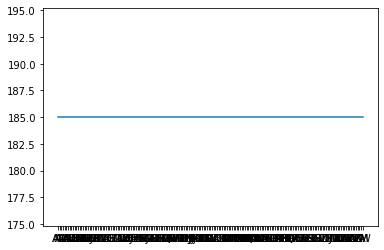

In [6]:
import matplotlib.pyplot as plt

plt.plot(df)